# Teste 02 - Previsão 
<h4 align="center"> 
	🚀 Desafio Data Science - Questão 02 🚀 Finalizado ✅
</h4>

## Desenvolvido por:
<a href="https://github.com/vivianerenizia">
 <img style="border-radius: 50%;" src="https://avatars1.githubusercontent.com/u/31120743?s=400&u=a84a58b76a93373ab0581f3f5f04a8edb21f92e9&v=4" width="100px;" alt=""/>
 <br />
 <sub><b>Viviane Renizia</b></sub></a> <a href="https://github.com/vivianerenizia" title="Rocketseat"></a>
 <br />
 
 ## Desenvolvimento:

In [14]:
#Bibliotecas necessárias

import pandas as pd #análise e visualização dos dados
import matplotlib.pyplot as plt # Matplotlib é dedicada ao traçado gráfico em 2D. As funções do módulo pyplot modificam áreas da figura de uma forma intuitiva.
from fbprophet import Prophet #prever dados de séries temporais com base em modelo aditivo em que tendências não lineares são ajustadas com sazonalidade anual. 

In [2]:
plt.rcParams['figure.figsize'] = (11,6) # Definindo o tamanho dos plots

In [3]:
air = pd.read_csv('AirPassengers.csv') #Cria variável air que armazena a leitura do csv
air.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
air['Month'] = pd.to_datetime(air['Month'], infer_datetime_format=True) #chama a função que converte a data para o tipo datetime
#infer_datetime_format define o formato da data (dia, mês e ano)
indexedDataset = air.set_index(['Month']) #Setando o Mês como index da tabela

In [6]:
indexedDataset.head() #tabela com novo index

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


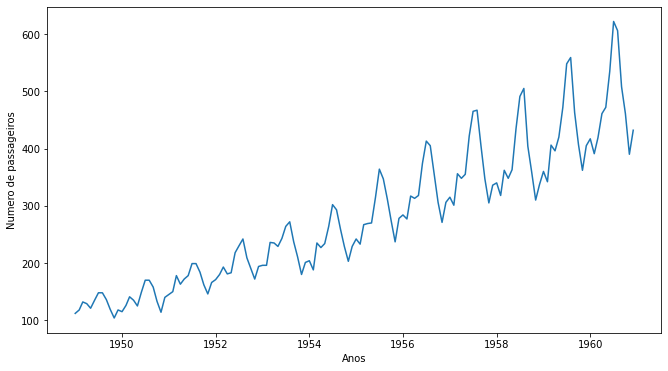

In [7]:
plt.xlabel("Anos") 
plt.ylabel("Numero de passageiros")
plt.plot(indexedDataset) #plotando o gráfico com os dados, eixo x é a data, eixo y é o numero de passageiros
plt.show()

In [8]:
train_dataset= pd.DataFrame() #criando um dataFrame chamado train_dataset (vazio)
train_dataset['ds'] = air['Month'] #Aqui define a coluna de mês como ds, por questões da biblioteca
train_dataset['y']= air['Passengers'] #Aqui define a coluna de passageiros como y, por questões da biblioteca
train_dataset.head(144) 

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
prophet_basic = Prophet(daily_seasonality = False, weekly_seasonality=False) # Ajusta o modelo instanciando um novo objeto Propheto. 
#As configurações de previsão são passadas para o construtor. nesse caso definindo a sazonalidade diária e semanal como false pois não há dados diários e semanais.
prophet_basic.add_seasonality(name="yearly", period=365.25, fourier_order=10).fit(train_dataset) # Adiciona a sazonalidade anual e chama o fit passando o dataframe. 
future = prophet_basic.make_future_dataframe(periods=24, freq='MS') #variavel future recebendo um dataframa que estende até o futuro por um determinado período.
# para isso foi utilizado o método auxiliar make_future_dataframe. 
future.tail(24) #Por padrão, ele também inclui as datas do histórico então podemos ver ajuste do modelo também. 

INFO:fbprophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.


,ds
144,1961-01-01
145,1961-02-01
146,1961-03-01
147,1961-04-01
148,1961-05-01
149,1961-06-01
150,1961-07-01
151,1961-08-01
152,1961-09-01
153,1961-10-01


In [10]:
forecast = prophet_basic.predict(future) #O método predict atribui cada linha em future um valor previsto, nomeado yhat.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #O forecast é um novo dataframe que inclui uma coluna yhat com a previsão e intervalos de incerteza.

,ds,yhat,yhat_lower,yhat_upper
163,1962-08-01,613.355295,583.703842,640.406533
164,1962-09-01,565.304456,535.444978,593.070359
165,1962-10-01,529.623362,499.767803,558.481074
166,1962-11-01,496.694917,467.328051,525.639371
167,1962-12-01,526.248296,498.310704,554.073262


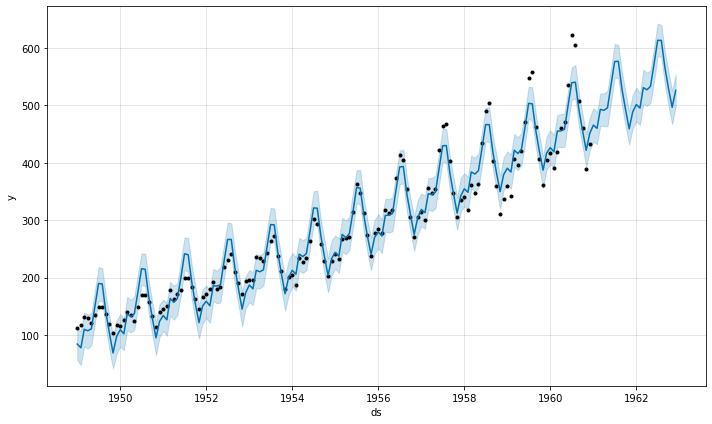

In [11]:
fig1=prophet_basic.plot(forecast) #Com o método plot tendo como parametro o dataframe de previsão, podemos obter o gráfico com a previsão.

## Informações adicionais:

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


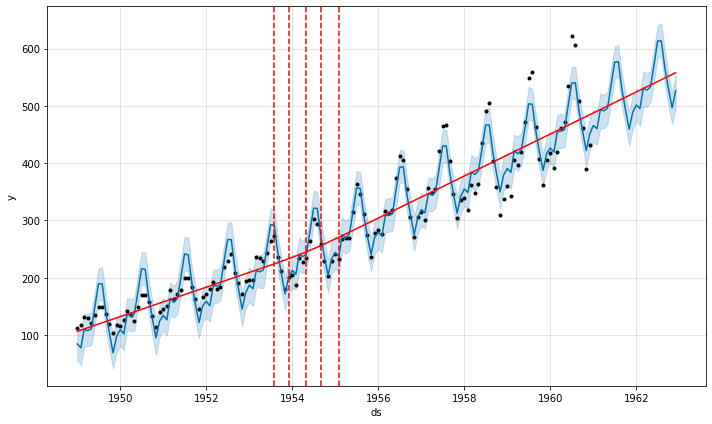

In [12]:
from fbprophet.plot import add_changepoints_to_plot #Para adicionar os pontos de mudança
pro_change= Prophet() #Instancia a prophet (não passei parametos de numero de pontos de mudanças pois não sei previamente quantos são)
forecast = pro_change.fit(train_dataset).predict(future) #treinamento e previsão
fig2 = pro_change.plot(forecast); #plot do gráfico de previsão
a = add_changepoints_to_plot(fig2.gca(), pro_change, forecast) #adicionando os pontos de mudança ao gráfico de previsão

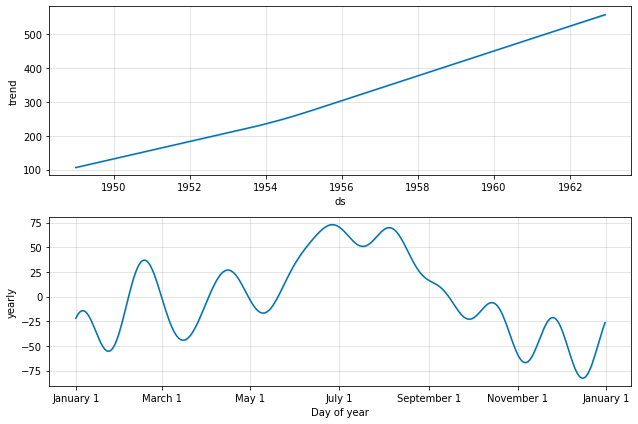

In [13]:
fig3 = prophet_basic.plot_components(forecast) #para plotar gráficos de informações de tendência de períodos